In [15]:
from tensorflow.keras.models import load_model
import yfinance as yf
import numpy as np

In [14]:
model = load_model("/models/ADANIENT.NS.h5")

In [8]:
data = yf.download("ADANIENT.NS",period="3d",interval="1d")

[*********************100%***********************]  1 of 1 completed


In [13]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-28,1145.000000,1398.0,1103.750000,1363.849976,1363.849976,33948366
2023-03-01,1424.000000,1580.0,1411.000000,1564.300049,1564.300049,20114340
2023-03-02,1499.900024,1646.0,1407.900024,1607.250000,1607.250000,26969695


In [77]:
close = []
for i in data.Close : 
    close.append(i)
print(close)
inputs = np.array(close).reshape(1,3,1)


[1363.8499755859375, 1564.300048828125, 1607.25]


In [59]:
temp = model.predict(np.array(close).reshape(1,3,1))[0][0]
close.append(temp)
close = close[1:4]
predictions.append(temp)
print(close)

1/1 [==============================] - 0s 28ms/step
[1564.300048828125, 1607.25, 1655.3654]


In [78]:
print(close)
predictions = []
for i in range(5):
    temp = model.predict(np.array(close).reshape(1,3,1))[0][0]
    close.append(temp)
    close = close[1:4]
    print(close)
    predictions.append(temp)

[1363.8499755859375, 1564.300048828125, 1607.25]
1/1 [==============================] - 0s 27ms/step
[1564.300048828125, 1607.25, 1655.3654]
1/1 [==============================] - 0s 29ms/step
[1607.25, 1655.3654, 1668.4796]
1/1 [==============================] - 0s 49ms/step
[1655.3654, 1668.4796, 1673.1494]
1/1 [==============================] - 0s 30ms/step
[1668.4796, 1673.1494, 1675.065]
1/1 [==============================] - 0s 32ms/step
[1673.1494, 1675.065, 1675.884]


In [75]:
predictions

[1676.5192, 1676.5192, 1676.5192, 1676.5192, 1676.5192]

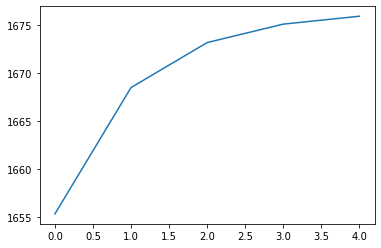

In [79]:
from matplotlib import pyplot as plt 
plt.plot(predictions)

In [88]:
data = yf.download("ADANIENT.NS",period="30d",interval="1d")
data["Target1"] = data.Close.shift(1)
data["Target2"] = data.Close.shift(2)
data["Target3"] = data.Close.shift(3)
data = data.dropna()
y = data.Close.values
X = data[["Target1","Target2","Target3"]].values

[*********************100%***********************]  1 of 1 completed


In [92]:
X.shape

(27, 3)

In [94]:
X = X.reshape((X.shape[0],3,1))
X

array([[[3436.35009766],
        [3456.14990234],
        [3463.55004883]],

       [[3442.        ],
        [3436.35009766],
        [3456.14990234]],

       [[3388.94995117],
        [3442.        ],
        [3436.35009766]],

       [[2761.44995117],
        [3388.94995117],
        [3442.        ]],

       [[2892.85009766],
        [2761.44995117],
        [3388.94995117]],

       [[2973.89990234],
        [2892.85009766],
        [2761.44995117]],

       [[2135.35009766],
        [2973.89990234],
        [2892.85009766]],

       [[1565.25      ],
        [2135.35009766],
        [2973.89990234]],

       [[1586.80004883],
        [1565.25      ],
        [2135.35009766]],

       [[1572.69995117],
        [1586.80004883],
        [1565.25      ]],

       [[1802.94995117],
        [1572.69995117],
        [1586.80004883]],

       [[2164.25      ],
        [1802.94995117],
        [1572.69995117]],

       [[1925.69995117],
        [2164.25      ],
        [1802.94995117]],


In [95]:
y_pred = model.predict(X)

1/1 [==============================] - 0s 91ms/step


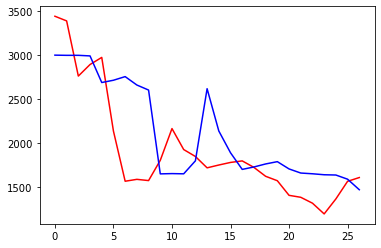

In [96]:
plt.plot(y,"r")
plt.plot(y_pred,"b")

In [97]:
from sklearn.metrics import r2_score
r2_score(y_pred,y)

0.2035475021241543